# Delivery_time -> Predict delivery time using sorting time 

# Build a simple linear regression model by performing EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df.size

42

In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.describe

<bound method NDFrame.describe of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [10]:
df.value_counts()

Delivery Time  Sorting Time
8.00           2               1
17.90          10              1
24.00          9               1
21.50          5               1
21.00          10              1
19.83          8               1
19.75          6               1
19.00          7               1
18.75          9               1
18.11          7               1
17.83          7               1
9.50           3               1
16.68          7               1
15.35          6               1
14.88          4               1
13.75          6               1
13.50          4               1
12.03          3               1
11.50          3               1
10.75          4               1
29.00          10              1
dtype: int64

In [11]:
df.corr

<bound method DataFrame.corr of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [12]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [13]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

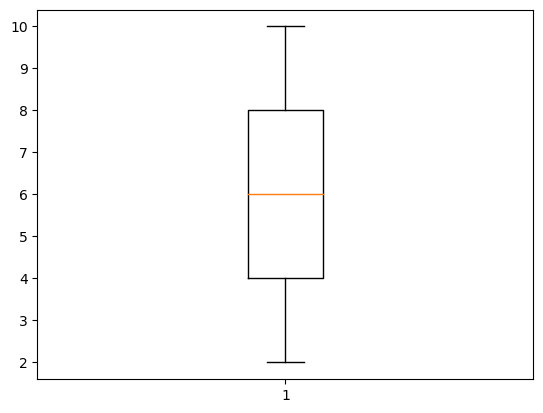

In [14]:
plt.boxplot(df['Sorting Time'])
plt.show()

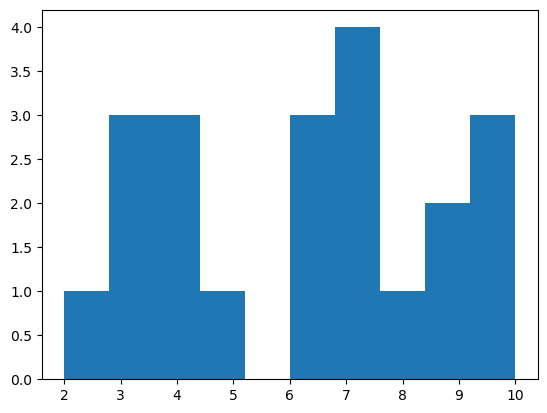

In [15]:
plt.hist(df["Sorting Time"])
plt.show()

In [16]:
import warnings
warnings.filterwarnings("ignore")

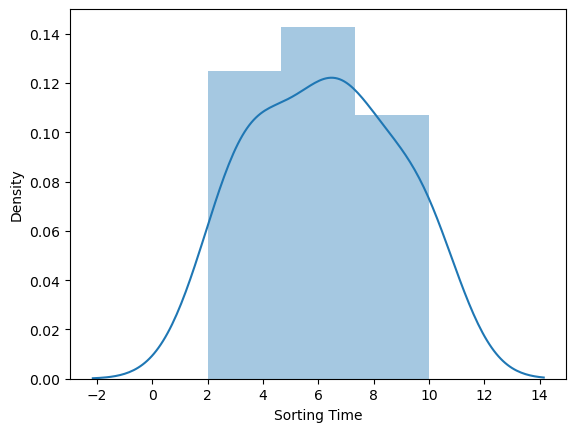

In [17]:
sns.distplot(df["Sorting Time"])
plt.show()

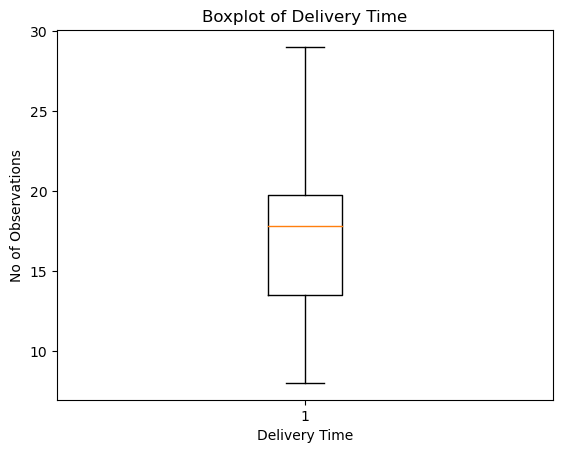

In [18]:
plt.boxplot(df["Delivery Time"])
plt.xlabel("Delivery Time")
plt.ylabel("No of Observations")
plt.title("Boxplot of Delivery Time")
plt.show()

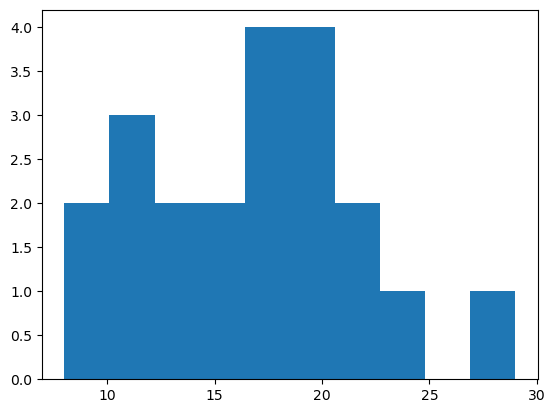

In [19]:
plt.hist(df["Delivery Time"])
plt.show()

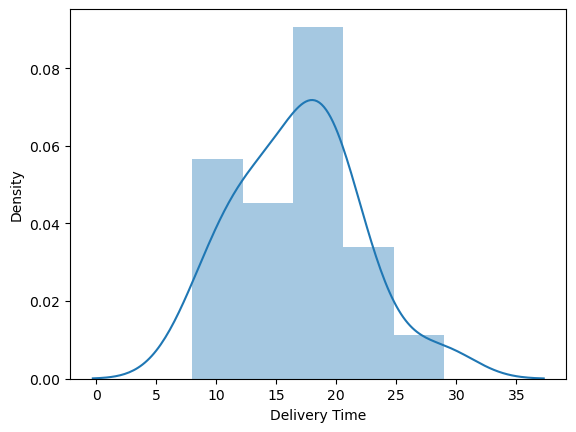

In [20]:
sns.distplot(df["Delivery Time"])
plt.show()

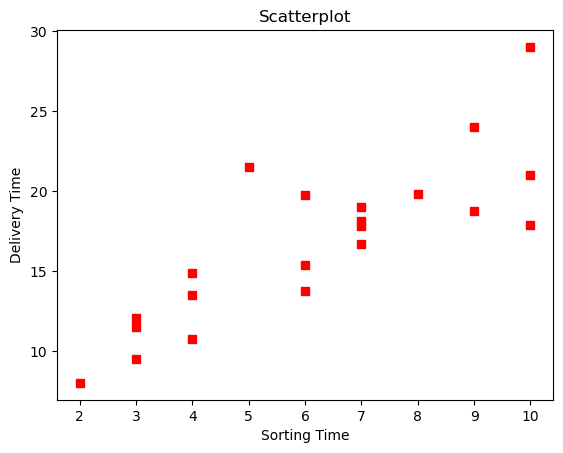

In [21]:
plt.plot(df["Sorting Time"],df["Delivery Time"],"rs")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Scatterplot")
plt.show()

In [22]:
df.corr

<bound method DataFrame.corr of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [23]:
df=df.rename({"Delivery Time": "delivery_time","Sorting Time": "sorting_time"},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
model1=smf.ols("delivery_time~sorting_time",data=df).fit()
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        20:47:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pred1=model1.predict(df.sorting_time)
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [27]:
model1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [28]:
rmse_1=np.sqrt(np.mean((np.array(df["sorting_time"])-np.array(pred1))**2))
rmse_1

10.722052392104557

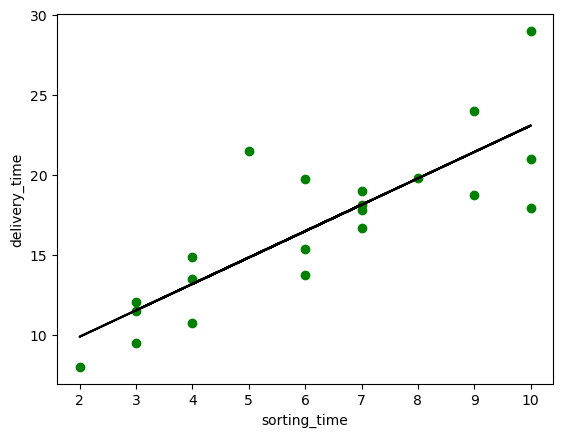

In [29]:
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="Green")
plt.plot(df["sorting_time"],pred1,color="Black")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

In [30]:
model2=smf.ols("delivery_time~np.log(sorting_time)",data=df).fit()
model2


In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.64e-06
Time:                        20:47:36   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred2=model2.predict(df.sorting_time)

In [33]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [34]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [35]:
rmse_log=np.sqrt(np.mean((np.array(df["sorting_time"])-np.array(pred2))**2))
rmse_log

10.749542066249479

In [36]:
pred2.corr(df.delivery_time)

0.8339325279256244

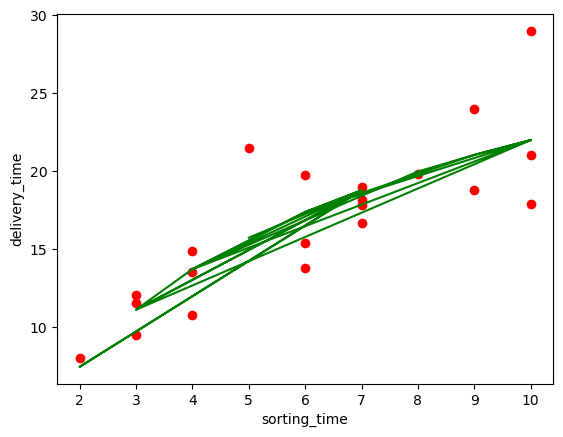

In [37]:
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="Red")
plt.plot(df["sorting_time"],pred2,color="Green")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

In [38]:
model3=smf.ols("delivery_time~np.cbrt(sorting_time)",data=df).fit()
model3

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.48e-06
Time:                        20:47:36   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(sorting_time)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred3=model3.predict(df.sorting_time)

In [41]:
pred3

0     22.390381
1     13.449801
2     17.071854
3     21.218070
4     22.390381
5     17.071854
6     18.582527
7     11.161157
8     22.390381
9     21.218070
10    19.955366
11    13.449801
12    18.582527
13    11.161157
14    11.161157
15    13.449801
16    17.071854
17    18.582527
18     8.286331
19    18.582527
20    15.382474
dtype: float64

In [42]:
model3.resid

0    -1.390381
1     0.050199
2     2.678146
3     2.781930
4     6.609619
5    -1.721854
6     0.417473
7    -1.661157
8    -4.490381
9    -2.468070
10   -0.125366
11   -2.699801
12   -1.902527
13    0.338843
14    0.868843
15    1.430199
16   -3.321854
17   -0.472527
18   -0.286331
19   -0.752527
20    6.117526
dtype: float64

In [43]:
rmse_cbrt=np.sqrt(np.mean((np.array(df["sorting_time"])-np.array(pred3))**2))
rmse_cbrt

10.738136071031226

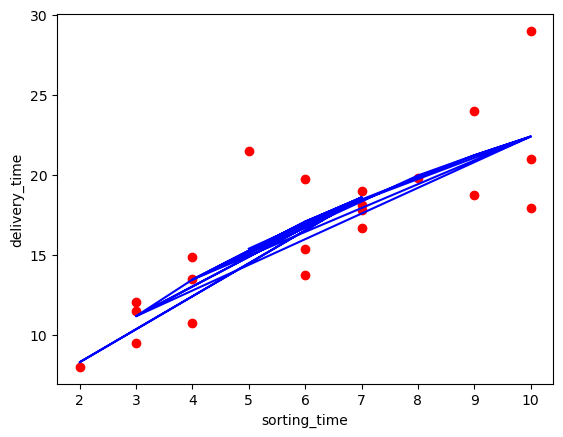

In [44]:
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="Red")
plt.plot(df["sorting_time"],pred3,color="Blue")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

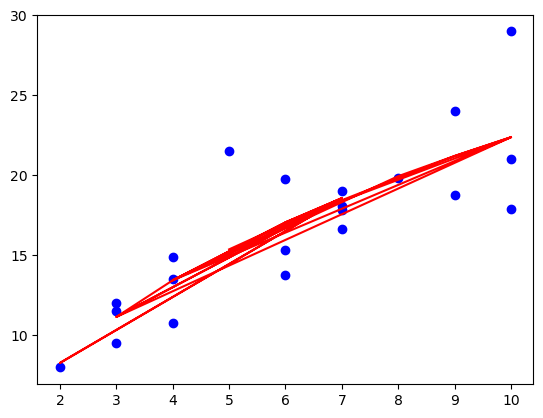

In [45]:
plt.plot(df["sorting_time"],df["delivery_time"],"bo")
plt.plot(df.sorting_time,pred3,color="red")

In [46]:
delivery_residual=model3.resid_pearson
delivery_residual

array([-0.48545255,  0.01752695,  0.93507631,  0.97131262,  2.30775266,
       -0.60118656,  0.14576095, -0.57999391, -1.56781957, -0.8617283 ,
       -0.04377155, -0.94263734, -0.66426856,  0.1183074 ,  0.30335724,
        0.49935485, -1.1598276 , -0.16498313, -0.09997269, -0.26274531,
        2.13593809])

<function matplotlib.pyplot.show(close=None, block=None)>

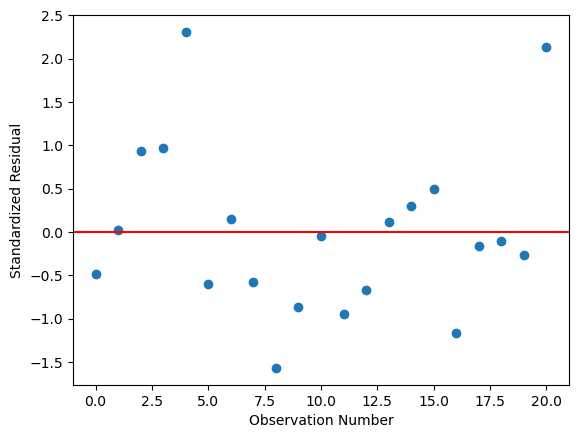

In [47]:
plt.plot(model3.resid_pearson,"o")
plt.axhline(y=0,color="red")
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show

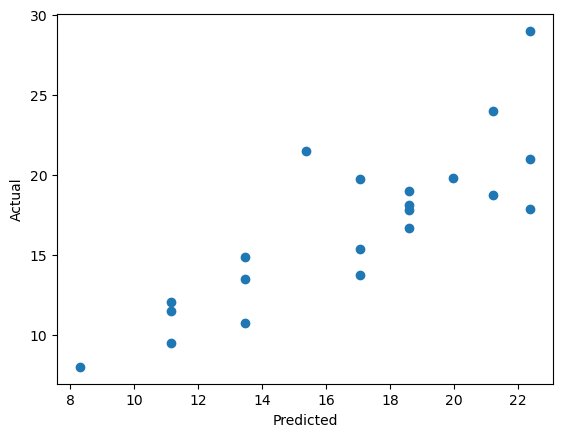

In [48]:
plt.scatter(x=pred3,y=df.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()